# Lecture 7: Risk Backtesting and Forecasting

So far, we have learned how to take a series of risk factors, map them to a loss distribution and use that distribution to define various risk measures (most notably, VaR and CVaR). This lecture will cover how to control, that is to review and assess the quality of a risk models you are using by backtesting or stress testing. This is done with the goal of overall improvement. 

The main topics of discussion are the following:

 1. Forecasting
 2. Backtesting
 3. VaR estimation: a practical example
 


In [1]:
#Importing standard libraries

import numpy as np
from matplotlib import pyplot as plt 
import scipy as sci
import pandas as pd

## Forecasting 

In simple terms, forecasting is the act of taking historical data, assuming a model which you fit to that data by optimizing for certain parameters $\vec{\theta}$, and using that model to try and _predict_ the future. 

One (rather terrible) example is using a polynomial fitting (see lecture 4) to predict stock prices, as will be done in the following code block:

In [2]:
from pandas_datareader import data ## This import allows us to import stock price data from yahoo finance
from scipy.optimize import curve_fit ## Function to fit dataset to function

def get_stock_price(ticker, start='2016-01-01', end='2020-12-31',price_type = 'Adj Close'): ##function from lecture 1
    return data.DataReader(ticker,'yahoo',start,end)[price_type]

training_data = list(get_stock_price('GOOG')) #google price data as a list

q_eq_5 = lambda t,a,b,c,d,e,f: a + b*t + c*(t**2) + d*(t**3) + e*(t**4) + f*(t**5) #polynomial function of order 5

model = curve_fit(q_eq_5,list(range(len(training_data))),training_data) #estimated beta values (params of best fit)

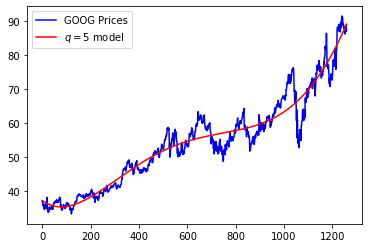

In [3]:
plt.plot(training_data,color='blue',label='GOOG Prices') #plotting stock data
plt.plot([q_eq_5(i,*model[0]) for i in range(len(training_data))],color='r',label=r'$q = 5$ model')#plotting the model
plt.legend()

As you can see, this polynomial fit follows the trend of GOOG prices from new year 2016 to new year 2021. Let us try to use this model to forecast prices throughout 2021 and 2022.

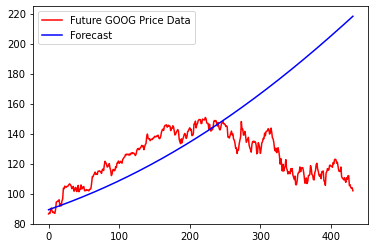

In [4]:
test_data = list(get_stock_price('GOOG', start='2021-01-01', end='2022-09-20')) ##Future data 

forecast = [q_eq_5(i,*model[0]) for i in range(len(training_data), len(training_data)+len(test_data))] #Forecast

plt.plot(test_data, color='r',label='Future GOOG Price Data')
plt.plot(forecast, color='b', label='Forecast')
plt.legend()

As you can see, the trend forecast is not too bad for the first ~200 days after the training period but gets increasingly worse later on. In fact, let us plot the error over time

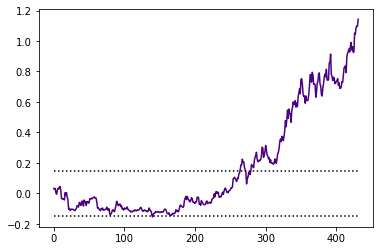

In [5]:
resid = [(forecast[i] - test_data[i])/test_data[i] for i in range(len(test_data))]

plt.plot(resid,color='indigo')
plt.plot([0.15 for i in range(len(test_data))],linestyle='dotted',color='black')
plt.plot([-0.15 for i in range(len(test_data))],linestyle='dotted', color='black')

Setting a 15 percent tolerance, we can see that the error greatly starts to diverge from the tolerance as time goes on. 

The data in the "training period" (i.e 2016-2021) is known as the _in-sample_ data. As you can see the model does a very good job of estimating the trend there. Although, the story is different for the _out-of-sample_ data (i.e the "testing period", 2021-2022).

Another example of estimating and forecasting is recording the height of highschool students and fitting it to a normal distribution with $\vec{\theta} = \{\mu,\sigma^2\}$ (that is, estimating the parameters) and using this model to forecast the distribution of height in the next 20 years (weird example as height tends to be constant in such short timeframes).

## Backtesting